Approximate run duration: 24 hours

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final


In [3]:
import sys
sys.path.append('code/')

In [4]:

from rww_pytorch_model import RNNWWD
from rww_pytorch_model import Model_fitting
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import seaborn as sns # for plotting 
import time # for timer
import os

In [5]:
def plot_sim_states_outputs(ts, output):
    """
    Plot the simulation states of trained input parameters. 

    Parameters
    ----------
    ts_sim: tensor with node_size X datapoint
        simulated BOLD
    ts: tensor with node_size X datapoint
        empirical BOLD
    E_sim: tensor with node_size X datapoint 
        simulated E 
    I_sim: tensor with node_size X datapoint
        simulated I 
    x_sim: tensor with node_size X datapoint
        simulated x 
    f_sim: tensor with node_size X datapoint
        simulated f 
    v_sim: tensor with node_size X datapoint
        simulated v 
    q_sim: tensor with node_size X datapoint
        simulated q 
    """
    ts_sim = output['simBOLD']
    E_sim = output['E']
    I_sim = output['I'] 
    x_sim = output['x'] 
    f_sim = output['f']
    v_sim = output['v'] 
    q_sim = output['q']
    fig, ax = plt.subplots(5, 2, figsize=(12,8))
    im1 = ax[0,0].imshow(np.corrcoef(ts_sim), cmap = 'bwr')
    ax[0,0].set_title('simFC')
    fig.colorbar(im1, ax=ax[0,0])
    im2 = ax[0,1].imshow(np.corrcoef(ts.T), cmap = 'bwr')
    ax[0,1].set_title('expFC')
    fig.colorbar(im2, ax=ax[0,1])
    ax[1,0].plot(ts_sim.T)
    ax[1,0].set_title('simBOLD')
    ax[1,1].plot(ts)
    ax[1,1].set_title('expBOLD')
    ax[2,0].plot(E_sim.T)
    ax[2,0].set_title('sim E')
    ax[2,1].plot(I_sim.T)
    ax[2,1].set_title('sim I')
    ax[3,0].plot(x_sim.T)
    ax[3,0].set_title('sim x')
    ax[3,1].plot(f_sim.T)
    ax[3,1].set_title('sim f')
    ax[4,0].plot(v_sim.T)
    ax[4,0].set_title('sim v')
    ax[4,1].plot(q_sim.T)
    ax[4,1].set_title('sim q')
    plt.show()
    
def plot_fit_parameters(output):
    g_par = output['g'] 
    gEE_par = output['gEE'] 
    gIE_par = output['gIE'] 
    gEI_par = output['gEI'] 
    g_mean_par = output['gmean'] 
    g_var_par = output['gvar'] 
    cA_par = output['cA'] 
    cB_par = output['cB'] 
    cC_par = output['cC'] 
    sigma_par = output['sigma_state']
    sigma_out_par = output['sigma_bold']
    """
    Plot the simulation states of fitted input parameters. 

    Parameters
    ----------
    g_par: list of fitted parameter values
        for g
    gEE_par: list of fitted parameter values
        for gEE
    gIE_par: list of fitted parameter values
        for gIE
    gEI_par: list of fitted parameter values
        for gEI
    sc_par: list of fitted parameter values
        for structural connectivity
    sc_par: list of fitted parameter values
        for sigma
    """
    fig, ax = plt.subplots(6,2, figsize=(12,8))
    im1 = ax[0,0].plot(g_par)
    ax[0,0].set_title('g')
    
    ax[0,1].plot(gEE_par)
    ax[0,1].set_title('gEE')
    
    ax[1,0].plot(gIE_par)
    ax[1,0].set_title('gIE')
    ax[1,1].plot(gEI_par)
    ax[1,1].set_title('gEI')
    
    ax[2,0].plot(sigma_par)
    ax[2,0].set_title('sc')

    ax[2,1].plot(sigma_out_par)
    ax[2,1].set_title('$\sigma$')
    ax[3,0].plot(g_mean_par)
    ax[3,0].set_title('post mean: g')

    ax[3,1].plot(g_var_par)
    ax[3,1].set_title('post var: g')

    ax[4,0].plot(cA_par)
    ax[4,0].set_title('post poly:A')

    ax[4,1].plot(cB_par)
    ax[4,1].set_title('post poly:B')

    ax[5,0].plot(cC_par)
    ax[5,0].set_title('post poly:C')

37
epoch:  0 0.3083640496548278
epoch:  1 0.5812708656129041
epoch:  2 0.6198234709662471
epoch:  3 0.646991885922684
epoch:  4 0.6936253888647561
epoch:  5 0.6312599767086858
epoch:  6 0.7312081574958887
epoch:  7 0.7407645061951535
epoch:  8 0.7818386971819635
epoch:  9 0.7830227352461749
epoch:  10 0.7804730657061459
epoch:  11 0.7951505920035917
epoch:  12 0.7335892086050432
epoch:  13 0.8023735364976022
epoch:  14 0.7991973694916461
epoch:  15 0.8079820684200764
epoch:  16 0.8192855478059127
epoch:  17 0.7963150949934904
epoch:  18 0.807674790715113
epoch:  19 0.8081417941607044
epoch:  20 0.7903890412421424
epoch:  21 0.8012690237248443
epoch:  22 0.7694359569205689
epoch:  23 0.7923939380092119
epoch:  24 0.7843351599834189
epoch:  25 0.7882763412310964
epoch:  26 0.7939472353059868
epoch:  27 0.7979998311480889
epoch:  28 0.7920456483536018
epoch:  29 0.7901615336325793
0.7982775503307225


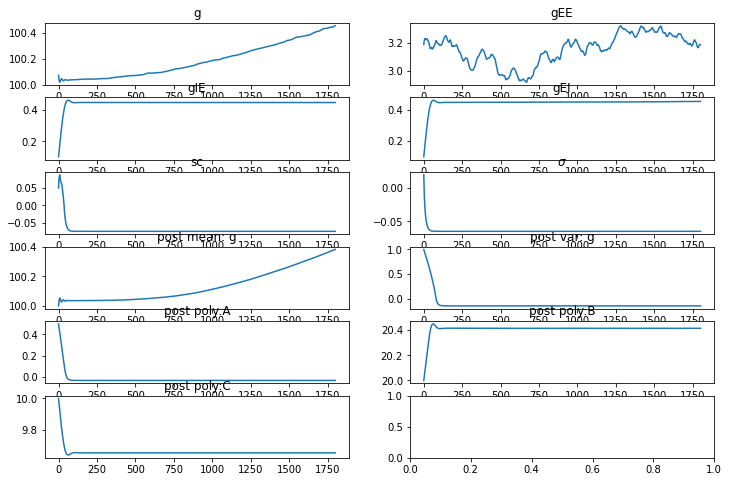

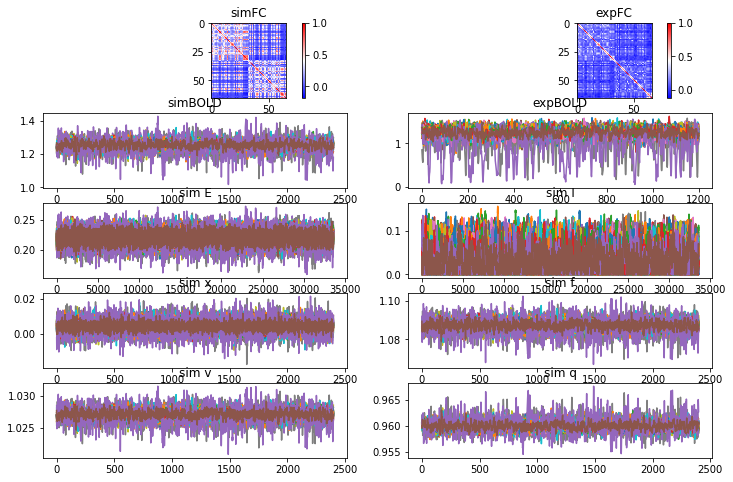

38
epoch:  0 0.506179696170472
epoch:  1 0.3373952598548021
epoch:  2 0.6084037360844651
epoch:  3 0.6385328376895448
epoch:  4 0.5506044236717778
epoch:  5 0.657597926903869
epoch:  6 0.7621577133541296
epoch:  7 0.7674291169918606
epoch:  8 0.7927320796651443
epoch:  9 0.7882564667352576
epoch:  10 0.7960567073700281
epoch:  11 0.8046897192455492
epoch:  12 0.7979069140705353
epoch:  13 0.7864766307976335
epoch:  14 0.7796694330022008
epoch:  15 0.79721657908802
epoch:  16 0.7578089340950143
epoch:  17 0.7796495878414386
epoch:  18 0.7867988092328189
epoch:  19 0.7736992412851005
epoch:  20 0.7719660772700364
epoch:  21 0.7769673104970426
epoch:  22 0.7822065308675703
epoch:  23 0.7799878432754249
epoch:  24 0.7866701881687761
epoch:  25 0.7838356271240623
epoch:  26 0.7910026005451423
epoch:  27 0.776722355325801
epoch:  28 0.7660405811919089
epoch:  29 0.7556483783828413
0.7846507178208945


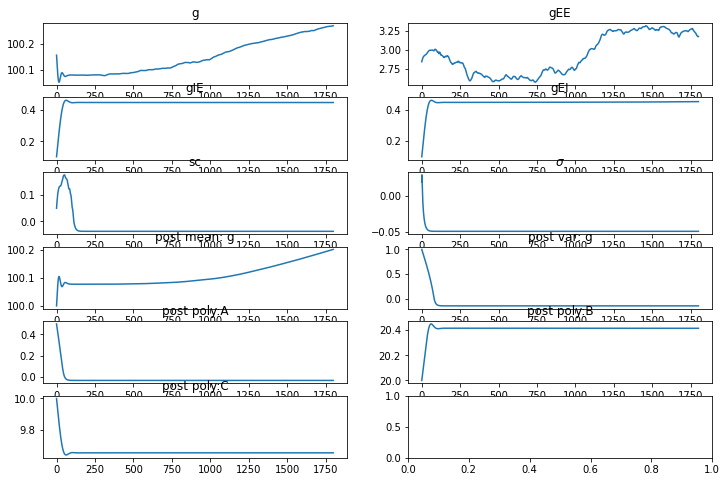

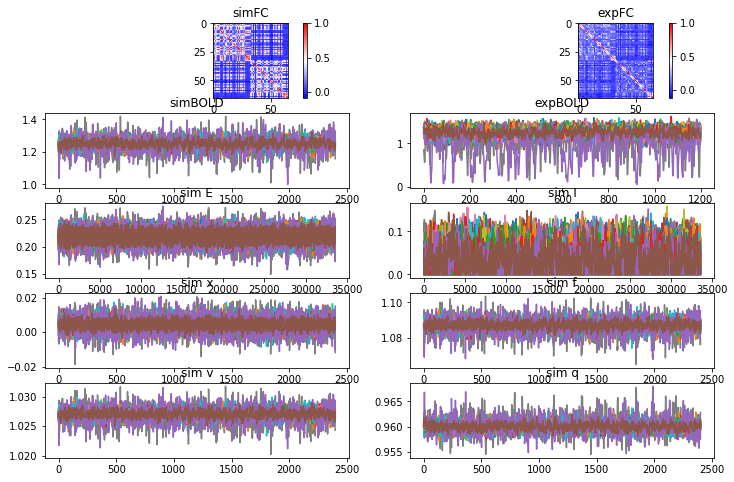

39
epoch:  0 0.4798853894653339
epoch:  1 0.42090337201208716
epoch:  2 0.608058648014679
epoch:  3 0.6338934328909777
epoch:  4 0.6643267951614802
epoch:  5 0.7021682610829462
epoch:  6 0.7126779004215841
epoch:  7 0.7735742982845806
epoch:  8 0.7651231917861238
epoch:  9 0.7903473296299709
epoch:  10 0.8027000384436911
epoch:  11 0.784336921482657
epoch:  12 0.8035855945358675
epoch:  13 0.7805658795417688
epoch:  14 0.7913622403524135
epoch:  15 0.8121076738210494
epoch:  16 0.8083671016595082
epoch:  17 0.7993353653515877
epoch:  18 0.8102236407872084
epoch:  19 0.8064554302301946
epoch:  20 0.8091291145715716
epoch:  21 0.8068133891872364
epoch:  22 0.8060295153067846
epoch:  23 0.8166277558015926
epoch:  24 0.7954342741813862
epoch:  25 0.807657760729685
epoch:  26 0.7933829844604092
epoch:  27 0.7807263959580485
epoch:  28 0.8003987640222899
epoch:  29 0.8068325546812969
0.8027505843541761


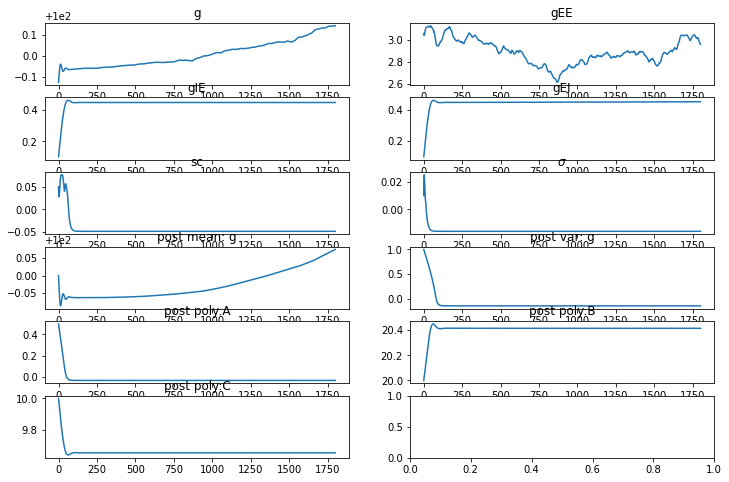

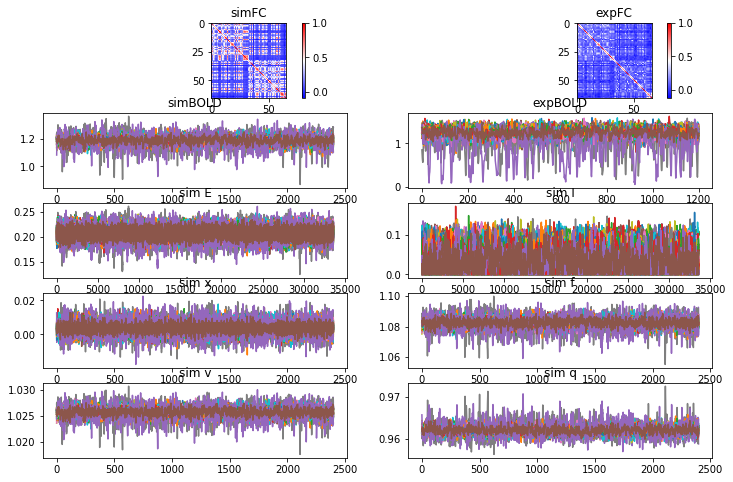

running time is  2913.5549128055573 's


In [6]:
start_time = time.time()


out_dir = '../data/Hagmann/'



for i in range(37,40):
    
    print(i)
    sub = 'sub_'+str(i)
    sc_file = '../data/Hagmann/weights.txt'
    ts_file = '../data/Hagmann/syn_ts.txt'
   
    node_size = 66
    mask=np.tril_indices(node_size, -1)
    output_size = 66
    num_epoches = 30
    batch_size = 20
    step_size = .05
    input_size = 2
    tr = 0.75

    

    sc_file = '../data/Hagmann/weights.txt'
    sc = np.loadtxt(sc_file)
    sc = sc -np.diag(np.diag(sc))
    SC = 0.5*(sc.T+sc)
    SC[SC>0] = SC[SC>0] + np.random.uniform(0,0.2, (SC[SC>0]).shape)
    sc = np.log1p(SC)/np.linalg.norm(np.log1p(SC))

    # sythetic ts
    ts_w = np.loadtxt(ts_file)
    ts = ts_w[2400:3600]
    fc_emp = np.corrcoef(ts.T)
    

    model = RNNWWD(input_size, node_size, batch_size, step_size, tr, sc, True, g_mean_ini=100, g_std_ini = .1, gEE_mean_ini=3.0, gEE_std_ini = .1)


        
    # call model fit method
    F = Model_fitting(model, ts, num_epoches)

    # fit data(train)

    output_train = F.train()

    
    output_test = F.test(120)
    plot_fit_parameters(output_train)
    plot_sim_states_outputs(ts, output_test)

    sc_mod = np.zeros_like(sc)
    sc_mod[mask] = output_train['gains'][-100:].mean(0)
    sc_mod = sc_mod+sc_mod.T
    w = (1 + np.tanh(sc_mod))*sc
    w_n = 0.5*(w + w.T)/np.linalg.norm(0.5*(w + w.T))
    
    np.savetxt(out_dir + 'bold_test_'+ sub +'.txt', output_test['simBOLD'])
    np.savetxt(out_dir + 'bold_train_'+ sub +'.txt', output_train['simBOLD'])
    np.savetxt(out_dir + 'sc_mod_'+ sub +'.txt', w_n)
    np.savetxt(out_dir + 'sc_'+ sub +'.txt', sc)
    g=  output_train['g'][-100:].mean()
    gEE = output_train['gEE'][-100:].mean()
    gEI = output_train['gEI'][-100:].mean()
    gIE = output_train['gIE'][-100:].mean()


    np.savetxt(out_dir + 'parameters_'+ sub +'.txt', np.array([g,gEE, gIE, gEI]).T)
end_time =  time.time()
print('running time is  {0} \'s'.format(end_time - start_time ))

In [7]:
Syn_ts_sim ={}
Syn_ts_test ={}
Syn_paras = {}
Syn_sc_mod = {}
Syn_sc = {}
for i in range(39):
    sub = 'sub_'+str(i)
    

    Syn_ts_test[sub] = np.loadtxt('../data/Hagmann/bold_test_'+ sub +'.txt')
    Syn_ts_sim[sub] = np.loadtxt('../data/Hagmann/bold_train_'+ sub +'.txt')
    Syn_sc_mod[sub] = np.loadtxt('../data/Hagmann/sc_mod_'+ sub +'.txt')
    Syn_sc[sub] = np.loadtxt('../data/Hagmann/sc_'+ sub +'.txt')
    
    Syn_paras[sub] = np.loadtxt('../data/Hagmann/parameters_'+ sub +'.txt')
    
np.save('../data/Hagmann/Syn_ts_sim.npy', Syn_ts_sim)
np.save('../data/Hagmann/Syn_ts_test.npy', Syn_ts_test)
np.save('../data/Hagmann/Syn_sc_mod.npy', Syn_sc_mod)
np.save('../data/Hagmann/Syn_sc.npy', Syn_sc)
np.save('../data/Hagmann/Syn_fitparas.npy', Syn_paras)